<a href="https://colab.research.google.com/github/kaiquefreire05/pre-processing-base-census/blob/main/base_census_datascience_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas básicas

In [1]:
import pandas as pd # Gerenciamento dos arquivos csv
import numpy as np
import seaborn as sns # Visualização de gráficos
import matplotlib.pyplot as plt # Visualização de gráficos
import plotly.express as px # Visualização de gráficos

In [2]:
base_census = pd.read_csv('/content/drive/MyDrive/datasets/census.csv') # Lendo a base de dados

# Base do census

## Primeiras ações feitas

In [3]:
# Mostrando as 2 primeiras linhas
base_census.head(2)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [4]:
# Fazendo uma breve descrição
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Fazendo a soma dos valores nulos
base_census.isnull().sum()
# Como não tem valores nulos não é necessário fazer o tratamento dos valores faltantes

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Visualização de dados

In [6]:
# Verificando quantas pessoas ganham menos que 50k e que ganham mais
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

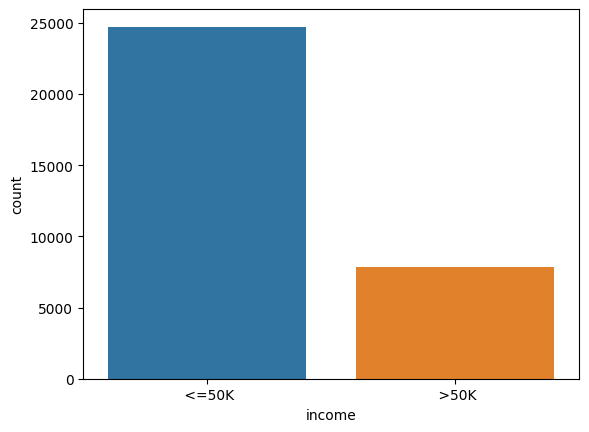

In [7]:
# Verificando isso em forma de tabela
sns.countplot(x = base_census['income']);

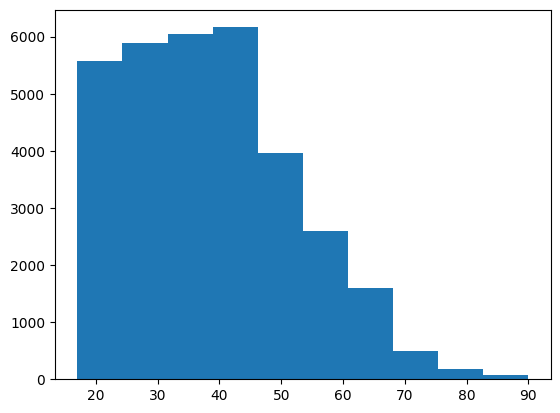

In [8]:
# Verificando pessoas por idade
plt.hist(x = base_census['age']);

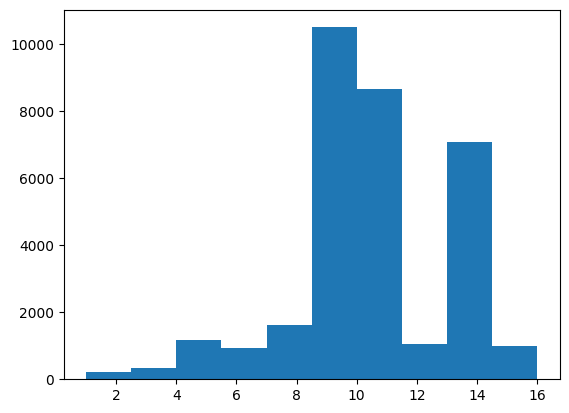

In [9]:
# Verificando pessoas pelo tempo de estudo na vida
plt.hist(x = base_census['education-num']);

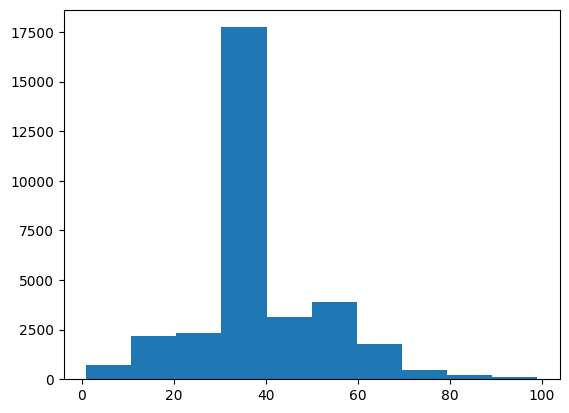

In [10]:
# Verificando o tempo de trabalho semanal
plt.hist(x = base_census['hour-per-week']);

In [11]:
# Gerando gráficos dinâmicos
# Conferindo a quantidade de pessoas por sua classe de trabalho
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [12]:
# Gerando gráficos dinâmicos
# Conferindo a quantidade de pessoas por sua classe de trabalho
grafico = px.treemap(base_census, path=['occupation', 'relationship'])
grafico.show()

In [13]:
# Outra forma de visualizar dados
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [14]:
# Fazendo uma melhor visualização usando o nível de educação e renda
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

## Divisão entre previsores e classe

In [15]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [16]:
# Pegando os previsores
x_census = base_census.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [17]:
# Pegando a classe ou resultado
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Tratamento de atributos categóricos (variáveis em string)

### LabelEncoder

In [18]:
# Fazendo importação do LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [19]:
x_census[0] # Variáveis ainda estão em string

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [20]:
# Criando as variáveis que vão transformar os dados de cada coluna
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [21]:
# Transformando as colunas em string em números
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [22]:
x_census[0] # Após o processo estão todas já em número

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

### OneHotEncoder

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
# Criando uma variável que para transformar as colunas
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')
# Se não colocar o passthrought ele vai apagar todas as colunas que não foram modificadas(originalmente numérica)

In [25]:
# Fazendo a transformação
x_census = onehotencoder_census.fit_transform(x_census).toarray()
x_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [26]:
# Printa apenas o primeiro cliente do dataframe
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [27]:
# visualizando quantas linha e colunas existem agora
x_census.shape

(32561, 108)

## Escalonamento de valores

In [28]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
# StandardScaler serve para fazer a padronização
# Como na minha base de dados existem valores altos e baixos em todas as colunas
# É melhor deixar todos padronizados para o peso ser igual

In [29]:
x_census = scaler_census.fit_transform(x_census)

In [30]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## Divisão entre bases de treinamento e de teste

In [31]:
from sklearn.model_selection import train_test_split # Usado para divir em modelos de treinos e testes

In [35]:
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size=0.15, random_state=0) # Pegando apenas 15% da base de dados para fazer o teste

In [36]:
# Quantidade de linhas e colunas que vão ser usadas no treinamento, verificando também o tipo da variável
print(x_census_treinamento.shape)
print(y_census_treinamento.shape)
type(x_census_treinamento)

(27676, 108)
(27676,)


numpy.ndarray

In [37]:
# Variáveis que vão ser usadas para fazer o teste
print(x_census_teste.shape)
print(y_census_teste.shape)
type(x_census_teste)

(4885, 108)
(4885,)


numpy.ndarray

## Salavando as bases de dados de treinamento e teste

In [38]:
import pickle

In [40]:
# Salvando as variáveis de treinamento e teste no formato pkl
with open('census.pkl', mode='wb') as f:
    pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)